In [4]:
import astropy.units as u
from astropy.visualization import quantity_support
quantity_support()
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LogNorm
from astropy.coordinates import SkyCoord
import astropy.constants as const

import numpy as np
import pandas as pd
import gala.dynamics as gd
import gala.units as gu

import kicker

Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
plt.style.use('dark_background')

In [7]:
%%time
p = kicker.pop.load("data/recent-pop")

CPU times: user 53.6 s, sys: 5.67 s, total: 59.3 s
Wall time: 59.6 s


In [8]:
%%time
p.final_coords

CPU times: user 3min 9s, sys: 1.34 s, total: 3min 10s
Wall time: 3min 10s


(<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
     (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
     [(-3.58381065, -2.19828055, -0.17347102),
      (-3.561643  ,  8.22347617, -0.02573523),
      (11.08881904, -6.48740099,  0.64263276), ...,
      (-6.40087606, -4.05604432,  0.08355496),
      (-7.38963303,  2.52365262,  0.08445799),
      ( 1.87191488, -4.6255381 ,  0.04790966)]
  (v_x, v_y, v_z) in km / s
     [( 119.66169713, -197.58332368, 29.78633888),
      (-212.29399149,  -88.24944141,  5.74654182),
      ( 118.00310088,  186.61387007,  2.68295421), ...,
      ( 124.4306478 , -195.91403567,  1.47051814),
      ( -75.95649703, -222.86426379, -0.64536491),
      ( 214.47460148,   92.33865836, 10.99941613)]>,
 <SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
     (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9

In [9]:
%%time
p.observables

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 18.431 s
  pix_info:   0.388 s
   samples:   7.207 s
      best:   3.207 s
       nan:   0.016 s
      sort:   7.554 s
       idx:   0.058 s
Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 25.756 s
  pix_info:   0.401 s
   samples:   9.135 s
      best:   5.275 s
       nan:   0.028 s
      sort:  10.847 s
       idx:   0.069 s


/home/tomwagg/anaconda3/envs/cosmic-gala/lib/python3.10/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in rxp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


pop size before extinction cut: 1322706
pop size after extinction cut: 1322706


/home/tomwagg/anaconda3/envs/cosmic-gala/lib/python3.10/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in rxp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


CPU times: user 50 s, sys: 3.93 s, total: 53.9 s
Wall time: 54.3 s


Av_1  Av_2    M_abs_1    m_app_1    M_abs_2    m_app_2  \
0        6.000000   6.0  11.382771  24.897635  11.799969  25.314832   
1        6.000000   6.0  10.077488  24.943918  10.461128  25.327557   
2        6.000000   6.0   7.277749  23.813746   7.939844  24.475841   
3        6.000000   6.0  10.622166  25.503097  10.639837  25.520768   
4        6.000000   6.0   4.680611  21.277233   5.111900  21.708521   
...           ...   ...        ...        ...        ...        ...   
1322701  6.000000   6.0  11.386396  25.856732  12.354855  26.825191   
1322702  3.299255   6.0   8.613453  21.011260  10.667908  23.065715   
1322703  6.000000   6.0  10.255019  23.475508  11.821355  25.041844   
1322704  1.536000   6.0   8.142804  20.241373  10.022208  22.120777   
1322705  6.000000   6.0  11.549582  26.759002  11.557857  26.767277   

           J_app_1  J_app_2    J_abs_1  J_abs_2    H_app_1  H_app_2   H_abs_1  \
0        24.084765      inf  10.569902      inf  22.842808      inf  9.327944   
1        24.315582      inf   9.449153      inf  23.027694      inf  8.161264   
2        23.544167      inf   7.008170      inf  22.229487      inf  5.693489   
3        24.594742      inf   9.713810      inf  23.331516      inf  8.450585   
4        21.467596      inf   4.870974      inf  20.521678      inf  3.925057   
...            ...      ...        ...      ...        ...      ...       ...   
1322701  25.230886      inf  10.760550      inf  23.986839      inf  9.516503   
1322702  20.161881      inf   7.764075      inf  19.093900      inf  6.696093   
1322703  23.133941      inf   9.913452      inf  21.849729      inf  8.629240   
1322704  18.975444      inf   6.876875      inf  18.078893      inf  5.980324   
1322705  25.767592      inf  10.558172      inf  24.517654      inf  9.308233   

         H_abs_2    K_app_1  K_app_2   K_abs_1  K_abs_2    G_app_1  G_app_2  \
0            inf  22.223061      inf  8.708198      inf  29.077081      inf   
1            inf  22.433720      inf  7.567290      inf  28.833148      inf   
2            inf  21.723767      inf  5.187769      inf  27.674465      inf   
3            inf  22.732012      inf  7.851080      inf  29.354260      inf   
4            inf  20.104754      inf  3.508133      inf  25.096460      inf   
...          ...        ...      ...       ...      ...        ...      ...   
1322701      inf  23.365941      inf  8.895605      inf  30.239386      inf   
1322702      inf  18.678618      inf  6.280811      inf  23.810950      inf   
1322703      inf  21.251519      inf  8.031030      inf  27.779457      inf   
1322704      inf  17.780292      inf  5.681723      inf  21.825413      inf   
1322705      inf  23.900192      inf  8.690772      inf  30.740582      inf   

            teff_obs  log_g_obs  secondary_brighter    G_abs_1  G_abs_2  \
0        3078.255215   5.014939               False  15.562218      inf   
1        3516.388224   4.972662               False  13.966718      inf   
2        4353.085485   4.687796               False  11.138468      inf   
3        3272.379340   4.970925               False  14.473329      inf   
4        6118.866242   4.513318               False   8.499839      inf   
...              ...        ...                 ...        ...      ...   
1322701  3077.179986   5.014969               False  15.769050      inf   
1322702  3736.384972   4.808846               False  11.413143      inf   
1322703  3435.882663   4.973798               False  14.558968      inf   
1322704  3866.656094   4.748524               False   9.726844      inf   
1322705  3052.010234   5.035552               False  15.531162      inf   

          BP_app_1  BP_app_2   BP_abs_1  BP_abs_2   RP_app_1  RP_app_2  \
0        33.179257       inf  19.664393       inf  27.655407       inf   
1        31.932125       inf  17.065695       inf  27.464534       inf   
2        30.036678       inf  13.500680       inf  26.376901       inf   
3        32.983172       inf  18.102240  

# Stellar type labels and colours

In [10]:
stellar_types = [
    None,
    {"long": "Main Sequence", "short": "MS", "colour": None},
    {"long": "Hertzsprung Gap", "short": "HG", "colour": None},
    {"long": "First Giant Branch", "short": "FGB", "colour": None},
    {"long": "Core Helium Burning", "short": "CHeB", "colour": None},
    {"long": "Early Asymptotic Giant Branch", "short": "EAGB", "colour": None},
    {"long": "Thermally Pulsing Asymptotic Giant Branch", "short": "TPAGB", "colour": None},
    {"long": "Helium Main Sequence", "short": "HeMS", "colour": None},
    {"long": "Helium Hertsprung Gap", "short": "HeHG", "colour": None},
    {"long": "Helium Giant Branch", "short": "HeGB", "colour": None},
    {"long": "Helium White Dwarf", "short": "HeWD", "colour": None},
    {"long": "Carbon/Oxygen White Dwarf", "short": "COWD", "colour": None},
    {"long": "Oxygen/Neon White Dwarf", "short": "ONeWD", "colour": None},
    {"long": "Neutron Star", "short": "NS", "colour": "grey"},
    {"long": "Black Hole", "short": "BH", "colour": "black"},
    {"long": "Massless Remnant", "short": "MR", "colour": "yellow"},
    {"long": "Chemically Homogeneous", "short": "CHE", "colour": "brown"}
]

for i in [1, 2]:
    stellar_types[i]["colour"] = plt.get_cmap("YlOrBr")(0.3 * i)

for i in [3, 4]:
    stellar_types[i]["colour"] = plt.get_cmap("Blues")(0.3 * (i - 2))

for i in [5, 6]:
    stellar_types[i]["colour"] = plt.get_cmap("Greens")(0.3 * (3 - (i - 4)))

for i in [7, 8, 9]:
    stellar_types[i]["colour"] = plt.get_cmap("plasma")(0.1 + 0.2 * (i - 7))

for i in [10, 11, 12]:
    stellar_types[i]["colour"] = plt.get_cmap("copper")(0.1 + 0.2 * (i - 9))

# Magnitude plots

In [11]:
def get_mag_combined(filter, mag_type):
    return np.concatenate((p.observables[f"{filter}_{mag_type}_1"][shiny],
                           p.observables[f"{filter}_{mag_type}_2"][shiny & disrupted]))

In [14]:
shiny = ~p.final_bpp["kstar_1"].isin([14, 15]).values
disrupted = p.final_bpp["sep"].values < 0.0

distances = np.concatenate((p.final_coords[0][shiny].icrs.distance, p.final_coords[1][shiny & disrupted].icrs.distance))
G_app = get_mag_combined("G", "app")
G_abs = get_mag_combined("G", "abs")
G_BP_app = get_mag_combined("BP", "app")
G_RP_app = get_mag_combined("RP", "app")
mass = np.concatenate((np.where(p.observables["secondary_brighter"],
                       p.final_bpp["mass_2"],
                       p.final_bpp["mass_1"])[shiny], p.final_bpp["mass_2"][shiny & disrupted]))
lum = np.concatenate((np.where(p.observables["secondary_brighter"],
                      p.final_bpp["lum_2"],
                      p.final_bpp["lum_1"])[shiny], p.final_bpp["lum_2"][shiny & disrupted]))
kstar = np.concatenate((np.where(p.observables["secondary_brighter"],
                        p.final_bpp["kstar_2"],
                        p.final_bpp["kstar_1"])[shiny], p.final_bpp["kstar_2"][shiny & disrupted])).astype(int)

kstar[kstar == 0] = 1
unique_kstars = np.unique(kstar)

## Gaia CMD

### By stellar type

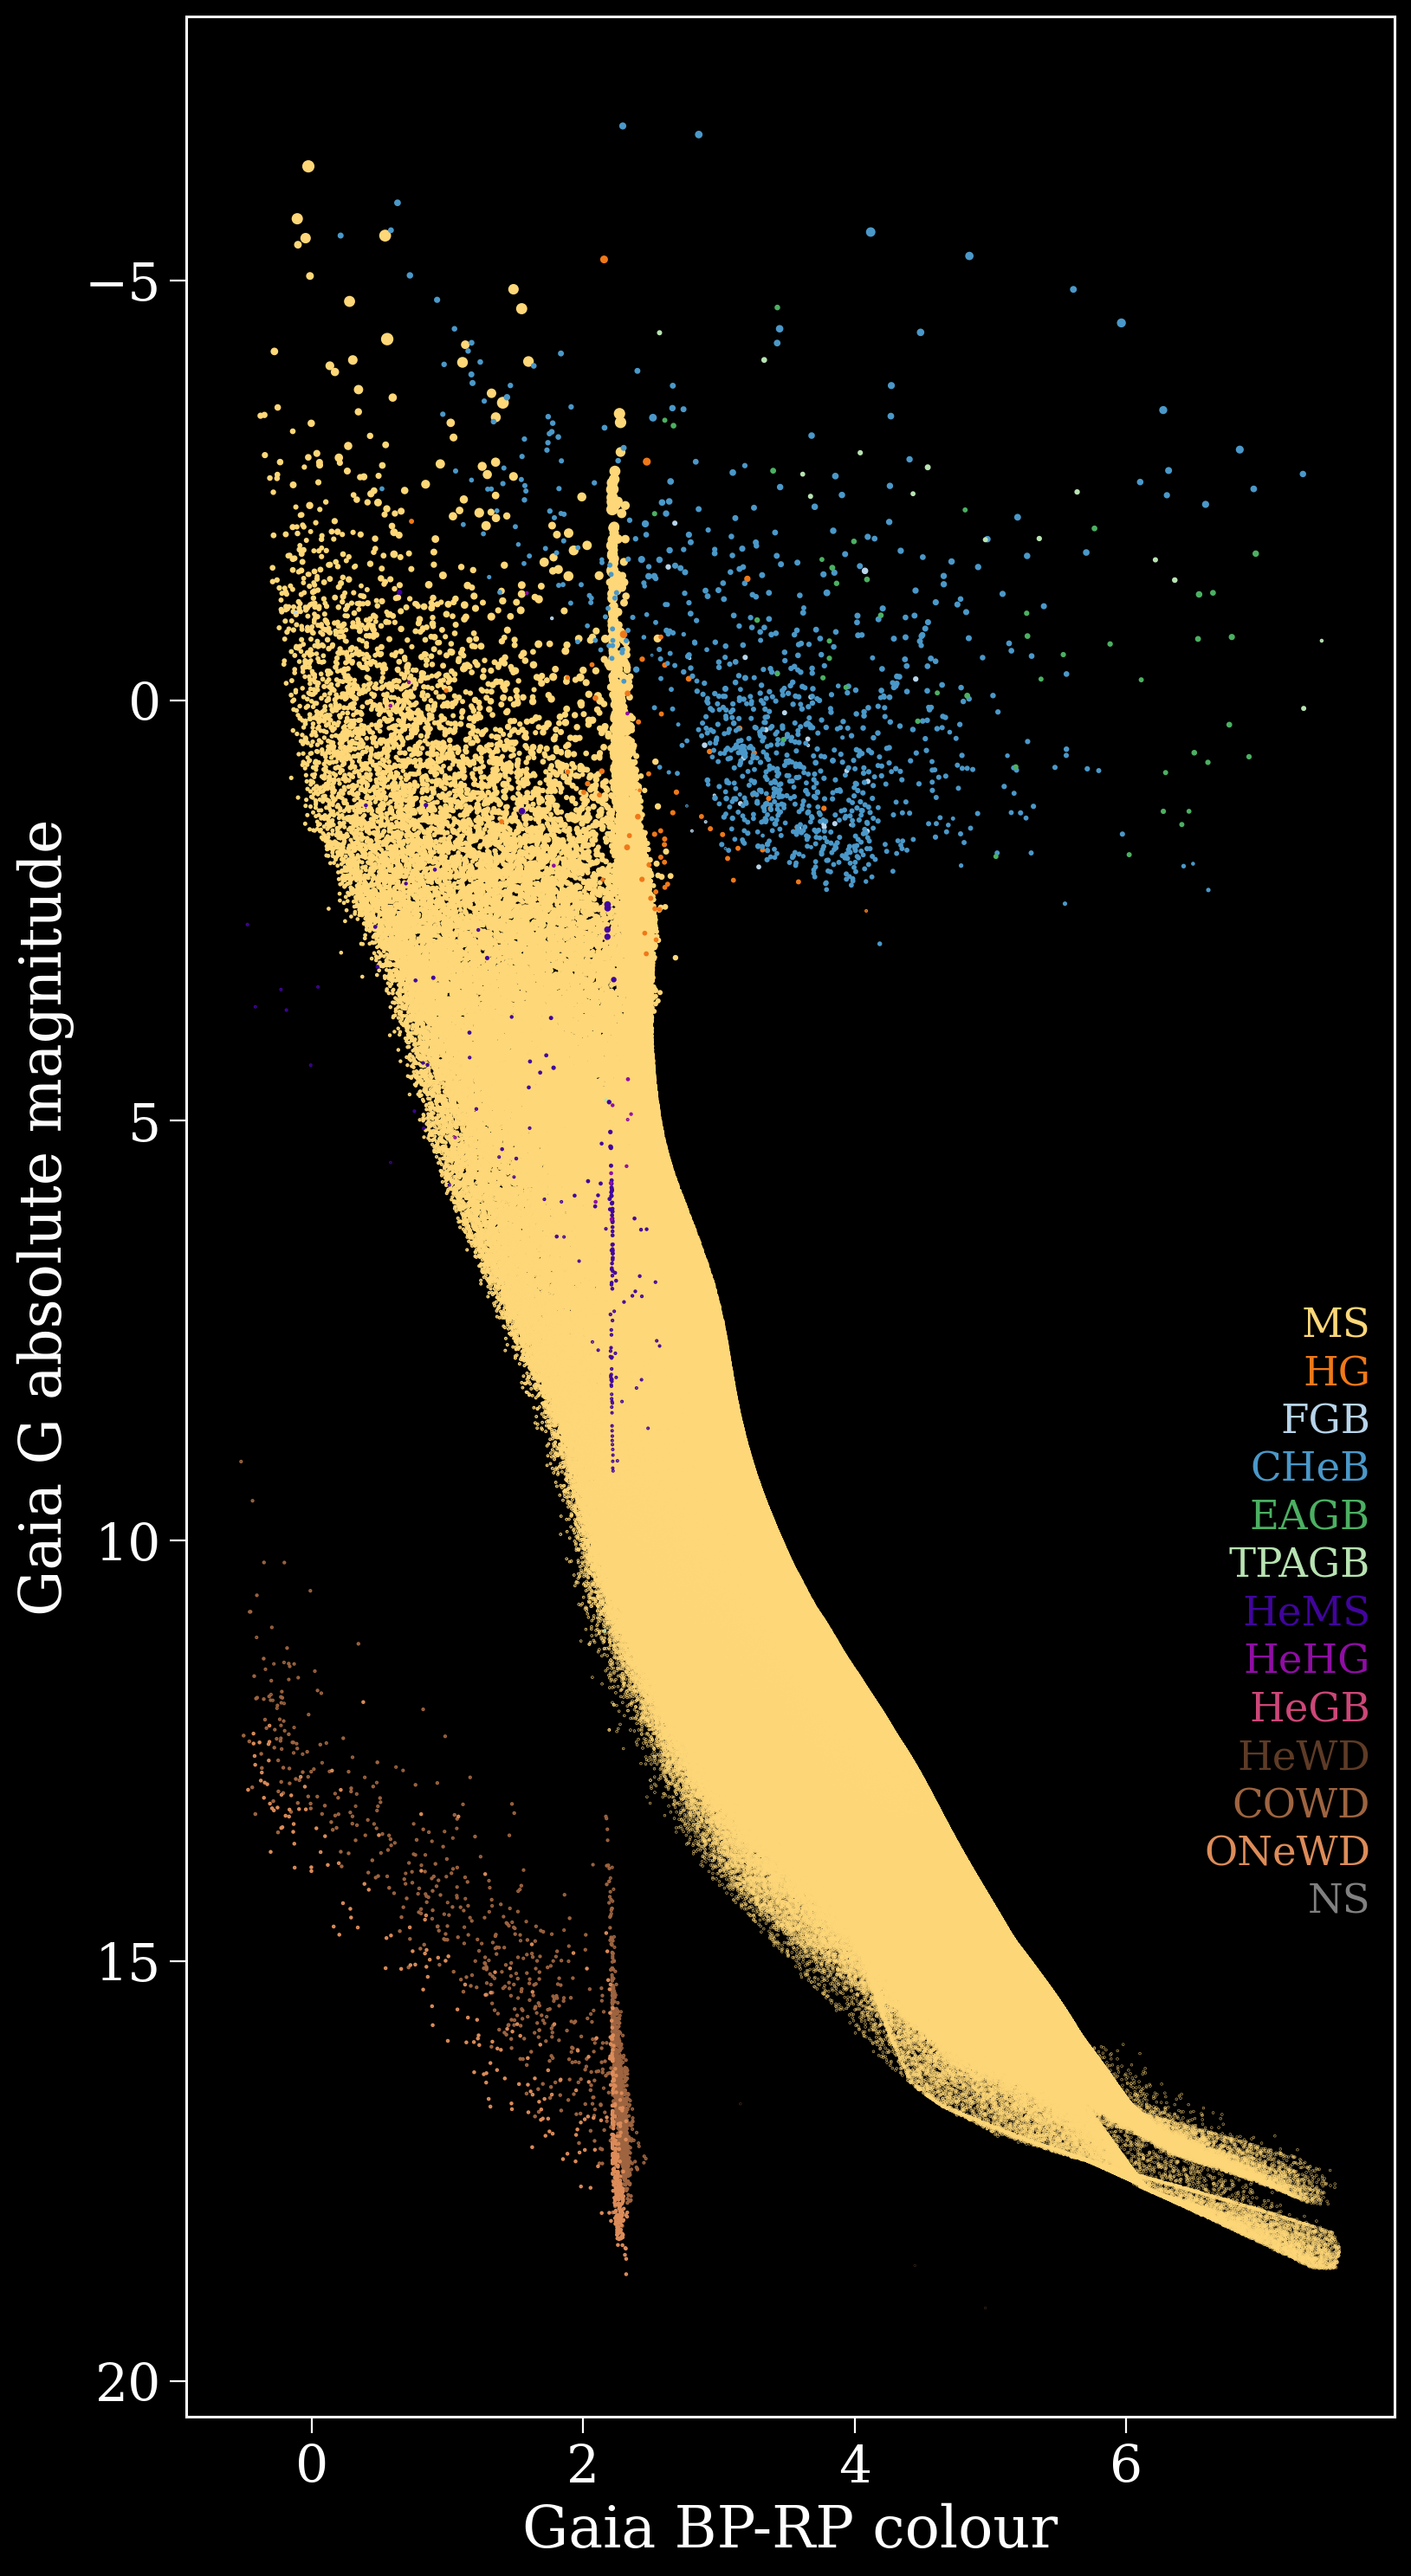

In [15]:
fig, ax = plt.subplots(figsize=(9, 18))

for stellar_type in unique_kstars:
    with np.errstate(invalid='ignore'):
        colour = G_BP_app - G_RP_app
    matching_kstar = kstar == stellar_type
    ax.scatter(colour[matching_kstar], G_abs[matching_kstar], s=0.3 * mass[matching_kstar],
               color=stellar_types[stellar_type]["colour"])

ax.set_ylim(reversed(ax.get_ylim()))

ax.set_xlabel("Gaia BP-RP colour")
ax.set_ylabel("Gaia G absolute magnitude")

stellar_type_range = range(1, 14)
for i, st in enumerate(stellar_type_range):
    ax.annotate(stellar_types[st]["short"], xy=(0.98, 0.2 + 0.02 * (len(stellar_type_range) - 0.5 - i)),
                xycoords="axes fraction", color=stellar_types[st]["colour"], fontsize=0.7*fs, ha="right")

plt.show()

## Distance vs. Apparent Magnitude

### Stellar Types

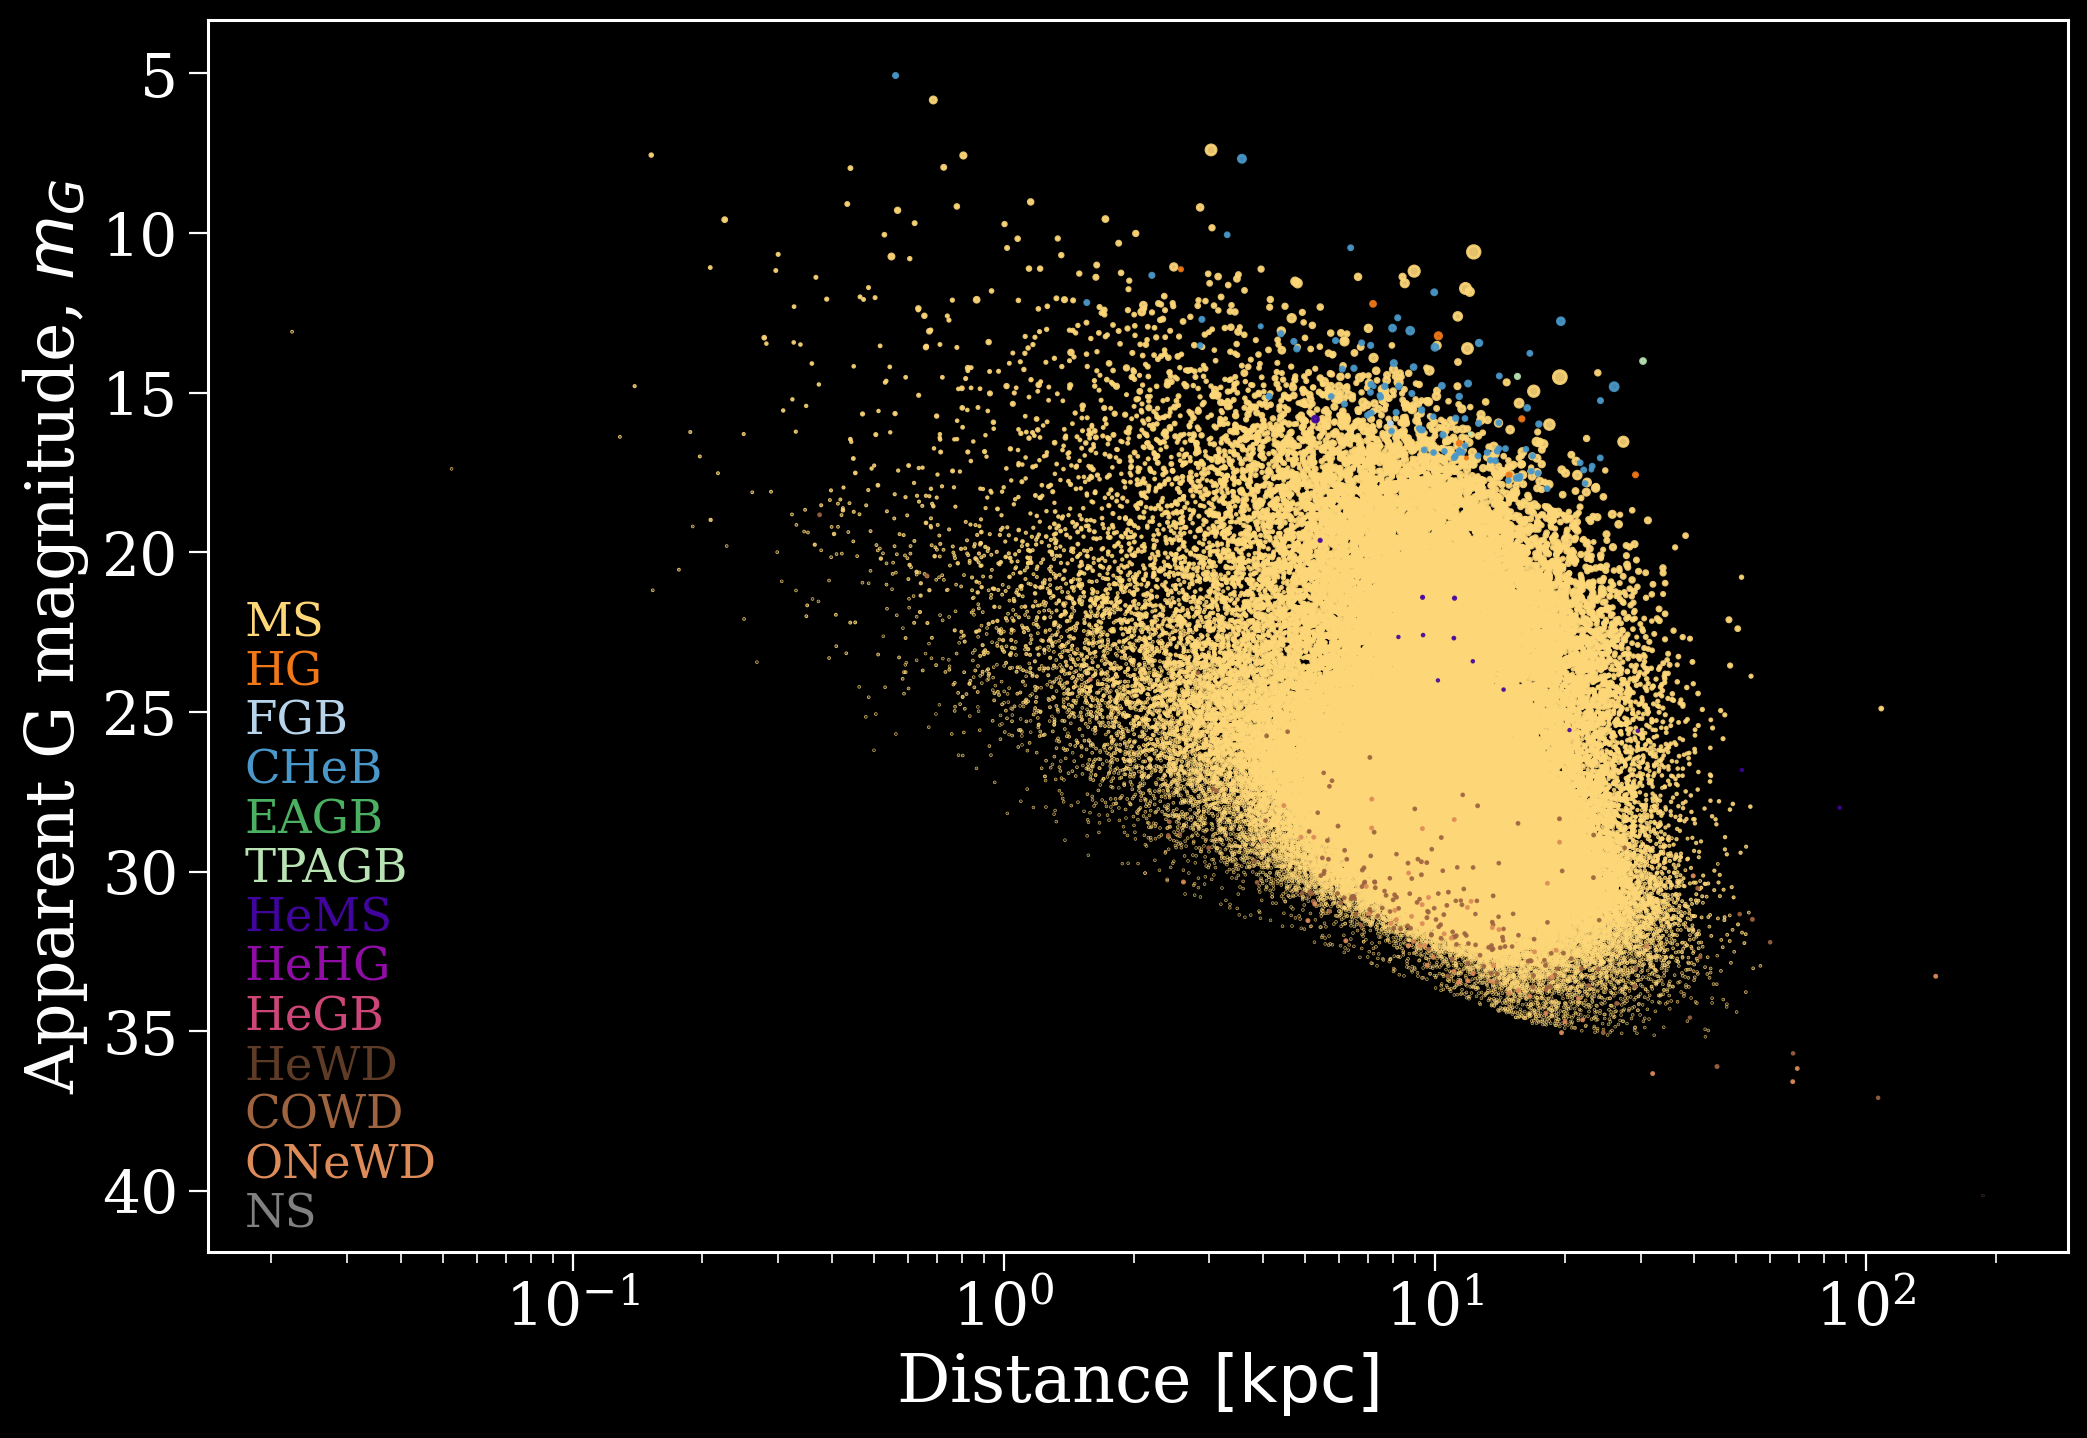

In [120]:
fig, ax = plt.subplots()

for stellar_type in unique_kstars:
    ax.scatter(distances[kstar == stellar_type], G_app[kstar == stellar_type],
               s=0.5 * mass[kstar == stellar_type], alpha=0.9,
               color=stellar_types[stellar_type]["colour"])

ax.set_xlabel(r"Distance $[\rm kpc]$")
ax.set_ylabel(r"Apparent G magnitude, $m_G$")
ax.set_xscale("log")
ax.set_ylim(reversed(ax.get_ylim()))

stellar_type_range = range(1, 14)
for i, st in enumerate(stellar_type_range):
    ax.annotate(stellar_types[st]["short"], xy=(0.02, 0.04 * (len(stellar_type_range) - 0.5 - i)),
                xycoords="axes fraction", color=stellar_types[st]["colour"], fontsize=0.7*fs)

plt.show()

### Luminosity

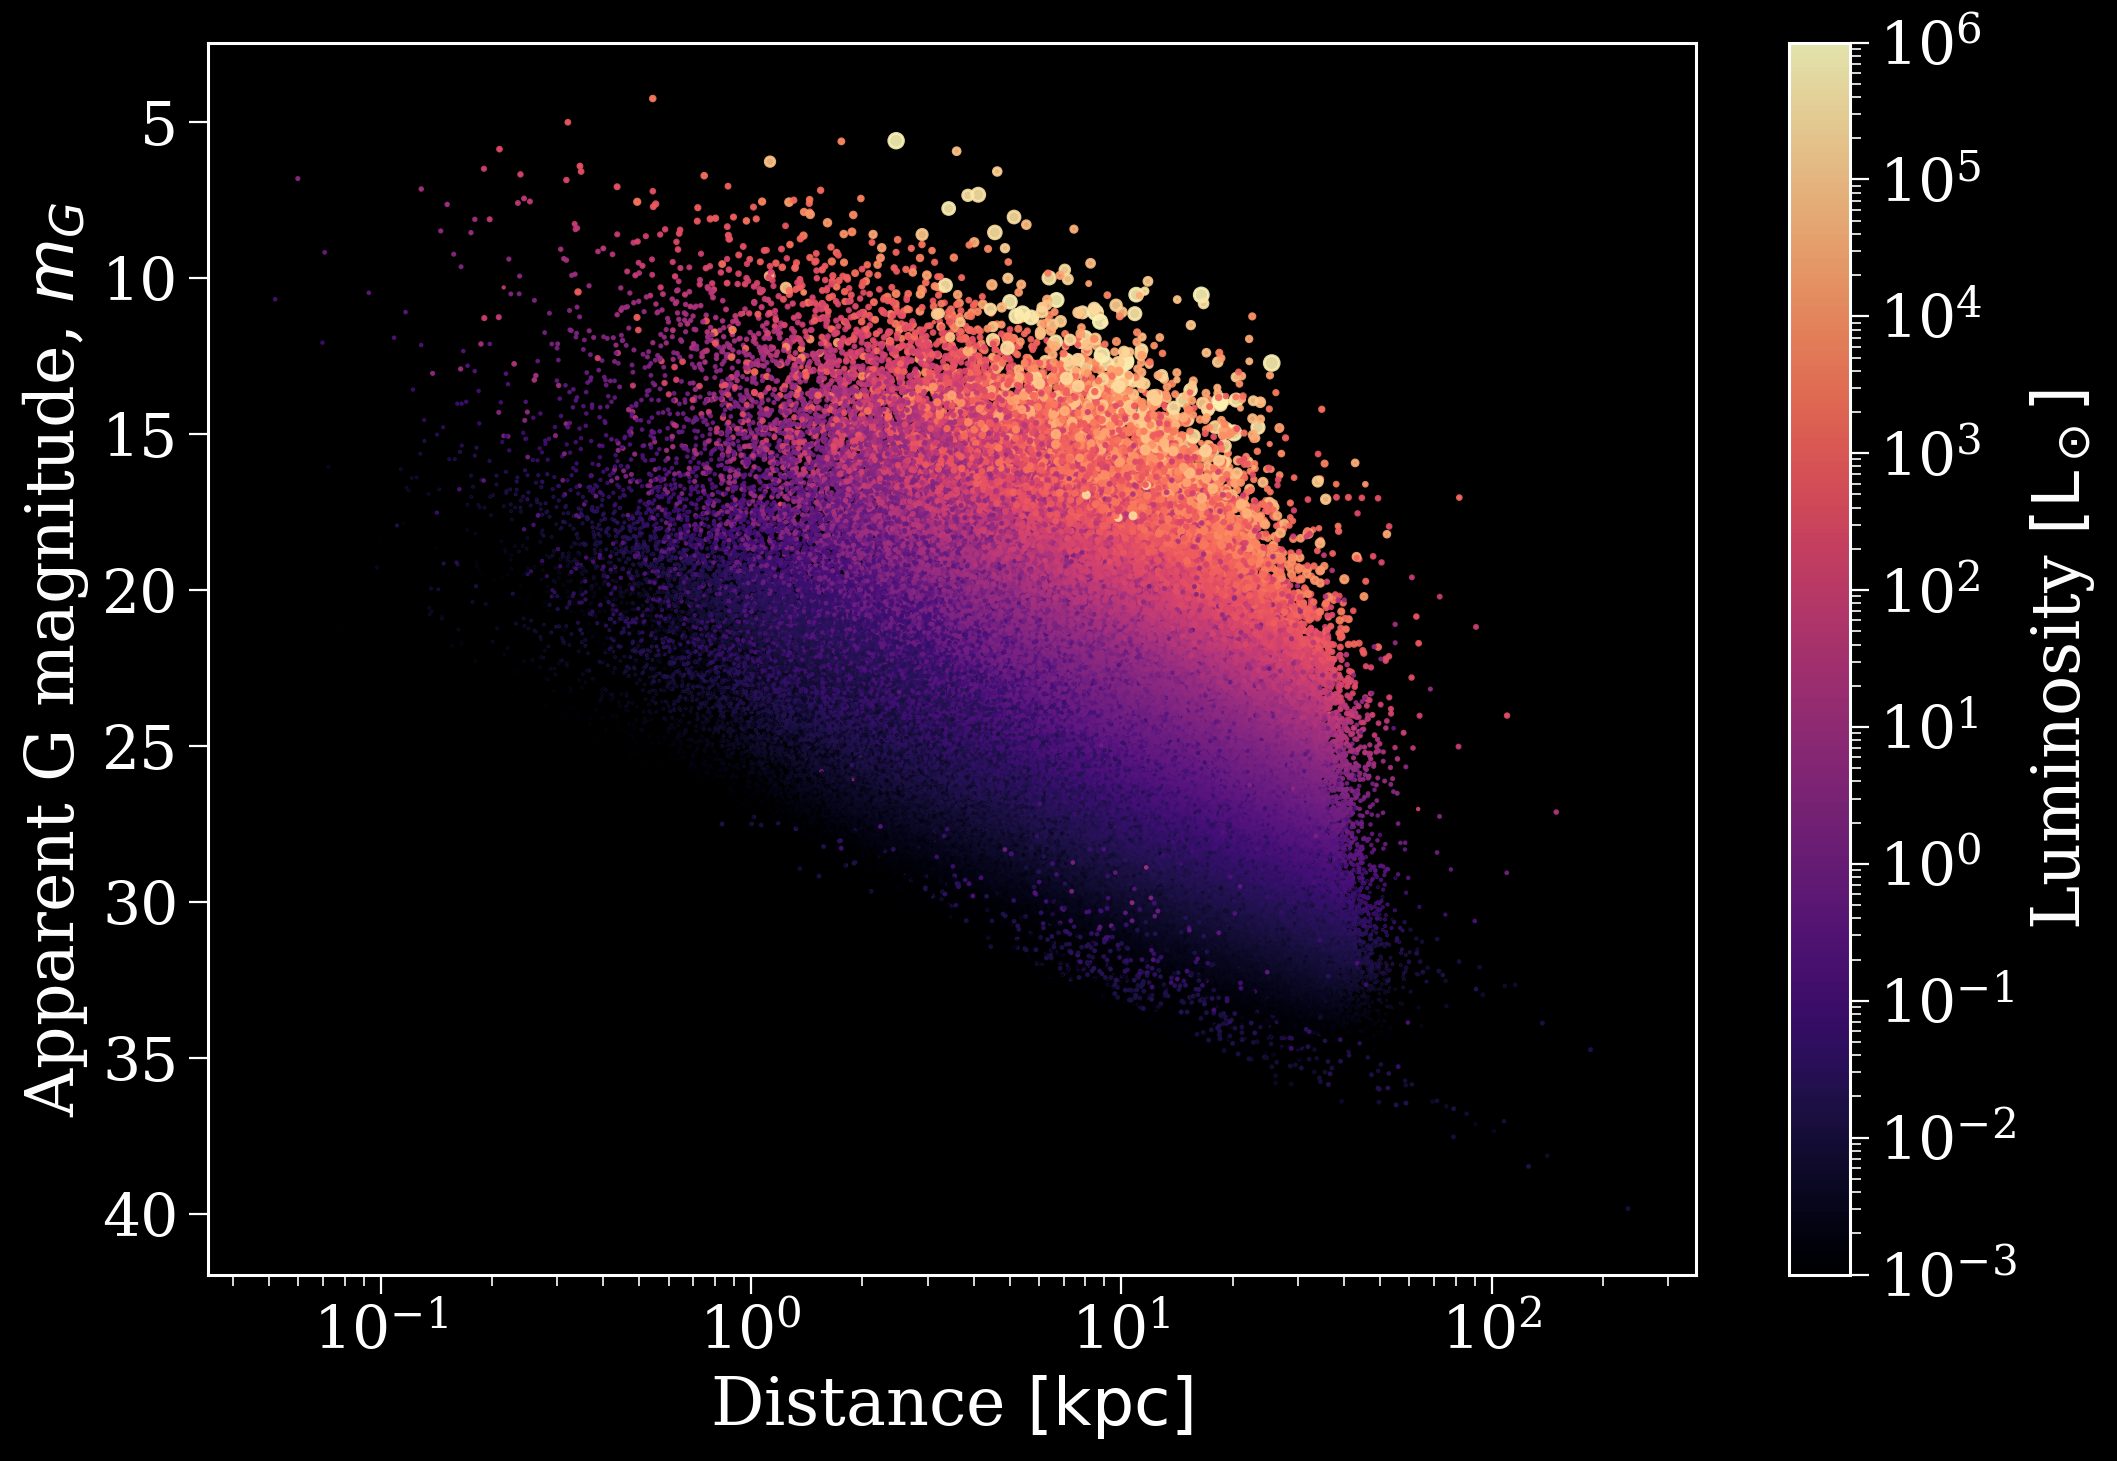

In [16]:
fig, ax = plt.subplots()

scatter = ax.scatter(distances, G_app, s=0.5 * mass, alpha=0.9,
                     c=lum, norm=LogNorm(vmin=1e-3, vmax=1e6), cmap="magma")

cbar = fig.colorbar(scatter, label=r"Luminosity $[\rm L_\odot]$")

ax.set_xlabel(r"Distance $[\rm kpc]$")
ax.set_ylabel(r"Apparent G magnitude, $m_G$")
ax.set_xscale("log")
ax.set_ylim(reversed(ax.get_ylim()))

plt.show()

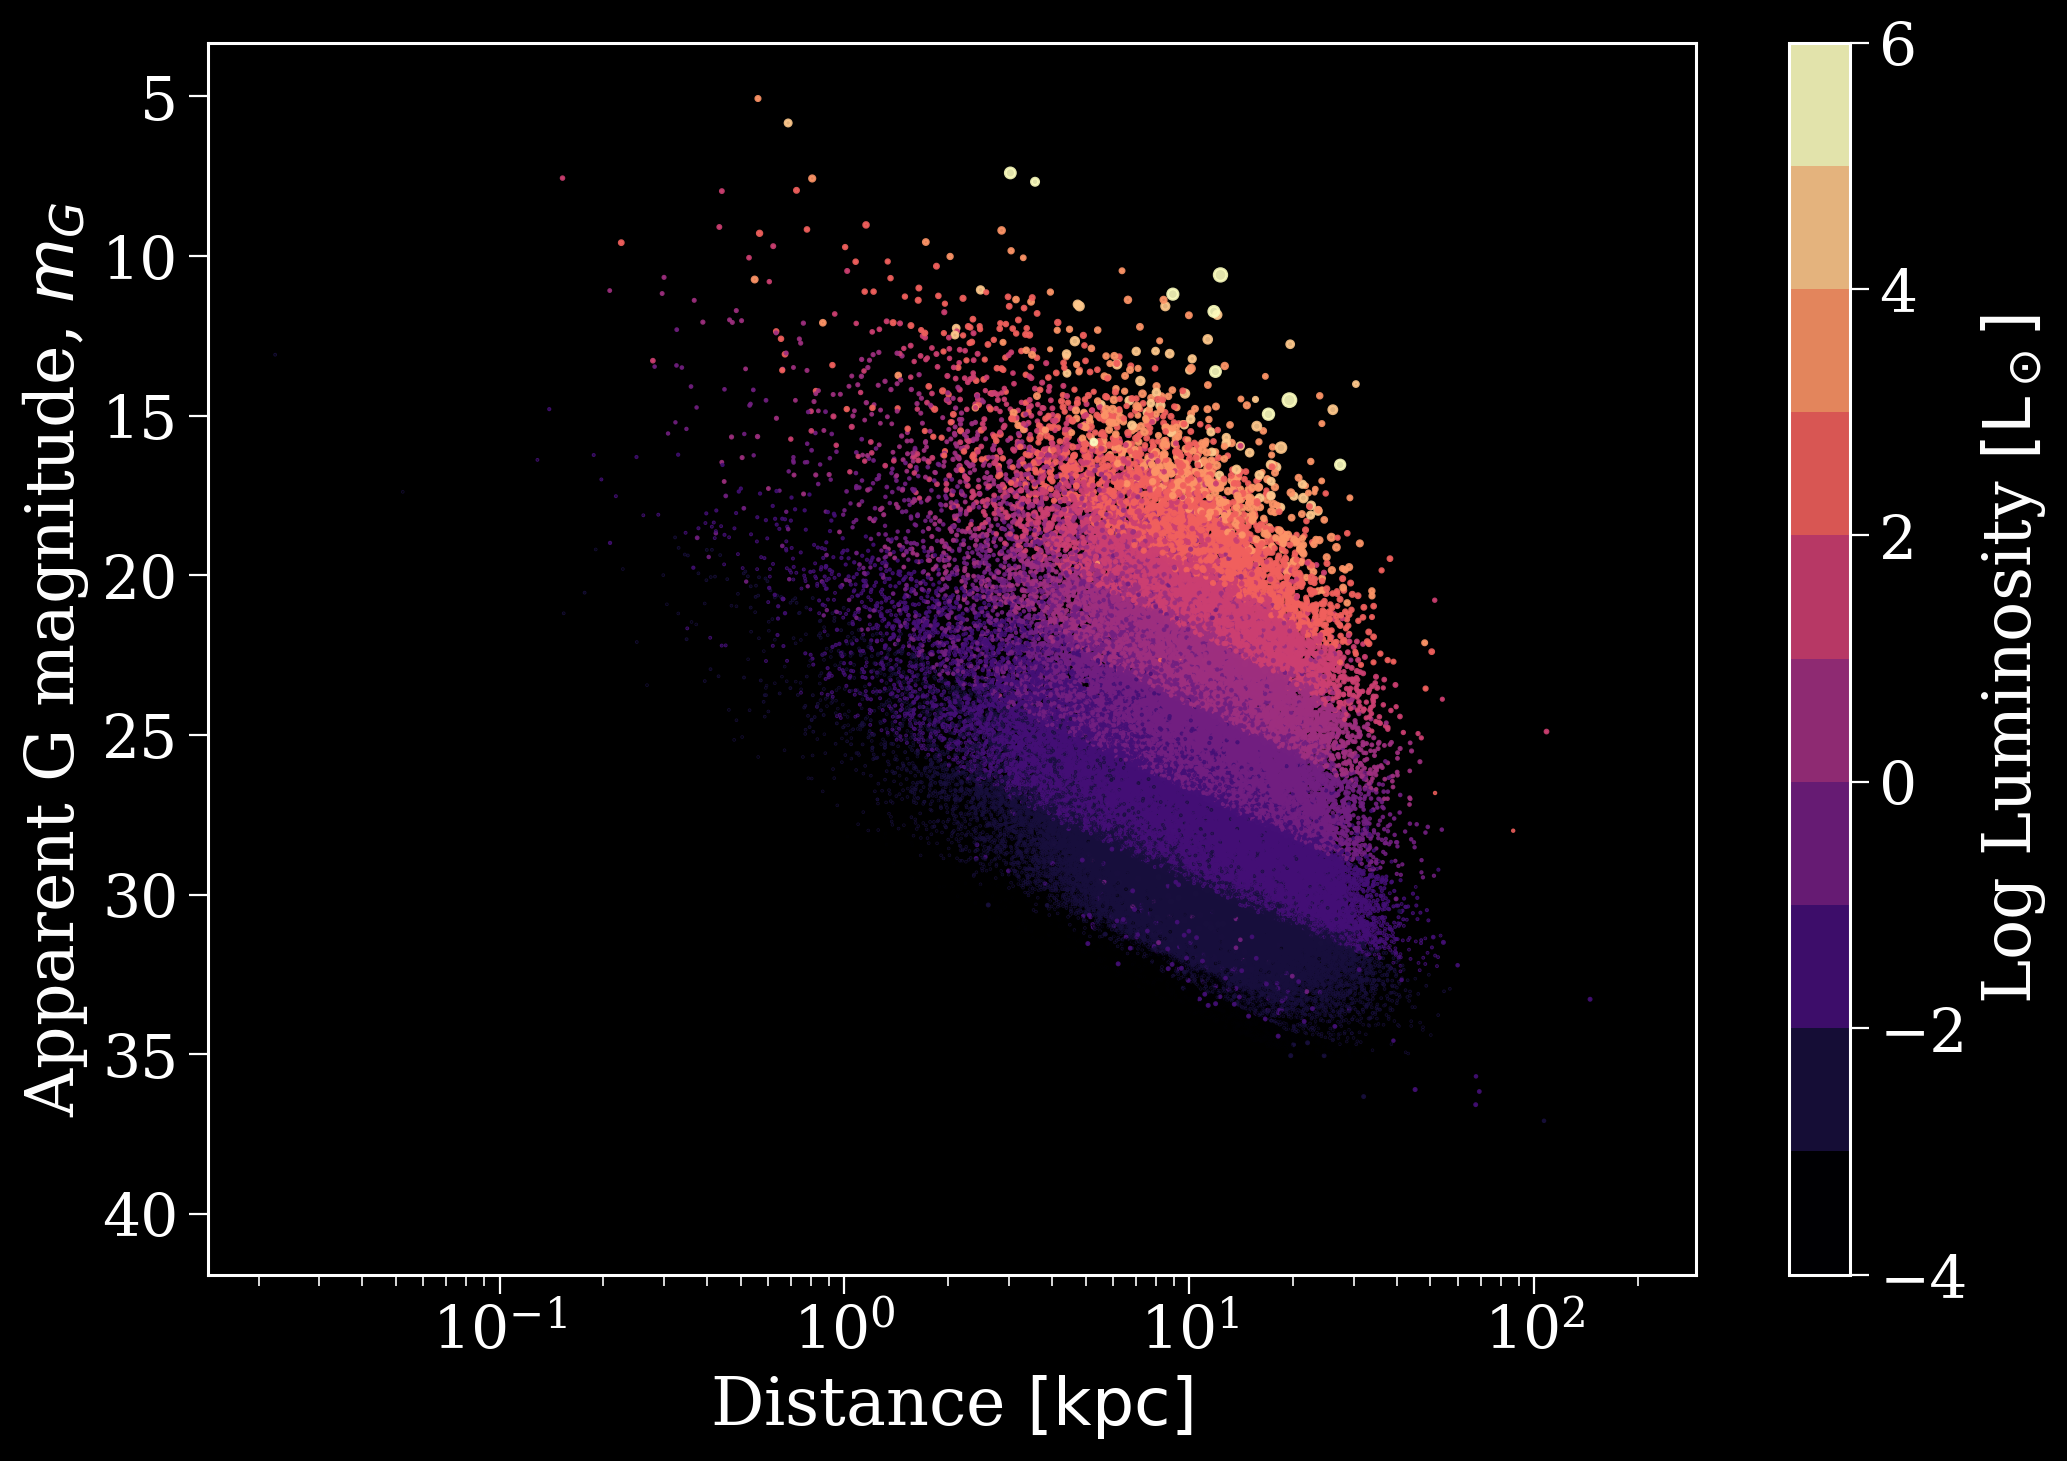

In [122]:
fig, ax = plt.subplots()

boundaries = [-4, -2, 0, 2, 4, 6]
boundaries = np.linspace(-4, 6, 11)

scatter = ax.scatter(distances, G_app, s=0.5 * mass, alpha=0.9,
                     c=np.log10(lum), norm=BoundaryNorm(boundaries=boundaries, ncolors=256), cmap="magma")

cbar = fig.colorbar(scatter, label=r"Log Luminosity $[\rm L_\odot]$")

ax.set_xlabel(r"Distance $[\rm kpc]$")
ax.set_ylabel(r"Apparent G magnitude, $m_G$")
ax.set_xscale("log")
ax.set_ylim(reversed(ax.get_ylim()))

plt.show()

In [123]:
plt.scatter(p.initial_galaxy.tau[p.final_bpp["sep"] < 0],
            disrupted_sep[p.final_bpp["sep"] < 0.0].value)

NameError: name 'disrupted_sep' is not defined

# Old grid plots

In [25]:
def grid_plot(x_var, y_var, x_label, y_label):
    fig, axes = plt.subplots(2, 2, figsize=(20, 20), gridspec_kw={"width_ratios": [3, 1], "height_ratios": [1, 3]})

    fig.subplots_adjust(hspace=0.0, wspace=0.0)

    disrupted = final_binaries["sep"] < 0
    kicked = final_binaries.index.isin(kicked_nums)

    axes[1, 0].scatter(np.abs(final_binaries[f"{x_var}_1"][~kicked]), np.abs(final_binaries[f"{y_var}_1"][~kicked]), s=5, label=f"No supernova ({len(final_binaries[~kicked])})")

    axes[1, 0].scatter(np.abs(final_binaries[f"{x_var}_1"][kicked]), np.abs(final_binaries[f"{y_var}_1"][kicked]), s=10, color="C1", label=f"At least 1 supernova ({len(final_binaries[kicked])})")
    axes[1, 0].scatter(np.abs(final_binaries[f"{x_var}_2"][kicked & disrupted]), np.abs(final_binaries[f"{y_var}_2"][kicked & disrupted]), s=5, color="C1")

    axes[1, 0].set_xscale("log")
    axes[1, 0].set_yscale("log")

    axes[1, 0].set_xlabel(x_label)
    axes[1, 0].set_ylabel(y_label)

    axes[1, 0].legend(fontsize=0.7*fs, markerscale=5, handletextpad=0.0)

    axes[0, 1].axis("off")

    x_bins = np.logspace(np.log10(np.abs(final_binaries[f"{x_var}_1"]).min()), np.log10(np.abs(final_binaries[f"{x_var}_1"]).max()), 50)
    axes[0, 0].hist(np.abs(final_binaries[f"{x_var}_1"][~kicked]), bins=x_bins, log=True)
    axes[0, 0].hist(np.abs(np.concatenate((final_binaries[f"{x_var}_1"][kicked], final_binaries[f"{x_var}_2"][kicked]))), bins=x_bins, log=True, alpha=0.5)
    axes[0, 0].set_xscale("log")
    axes[0, 0].set_xticks([])
    axes[0, 0].set_ylabel(r"$N_{\rm binary}$")

    y_bins = np.logspace(np.log10(np.abs(final_binaries[f"{y_var}_1"]).min()), np.log10(np.abs(final_binaries[f"{y_var}_1"]).max()), 50)
    axes[1, 1].hist(np.abs(final_binaries[f"{y_var}_1"][~kicked]), bins=y_bins, orientation="horizontal", log=True)
    axes[1, 1].hist(np.abs(np.concatenate((final_binaries[f"{y_var}_1"][kicked], final_binaries[f"{y_var}_2"][kicked]))), bins=y_bins, orientation="horizontal", log=True, alpha=0.5)
    axes[1, 1].set_yscale("log")
    axes[1, 1].set_yticks([])
    axes[1, 1].set_xlabel(r"$N_{\rm binary}$")

    plt.show()

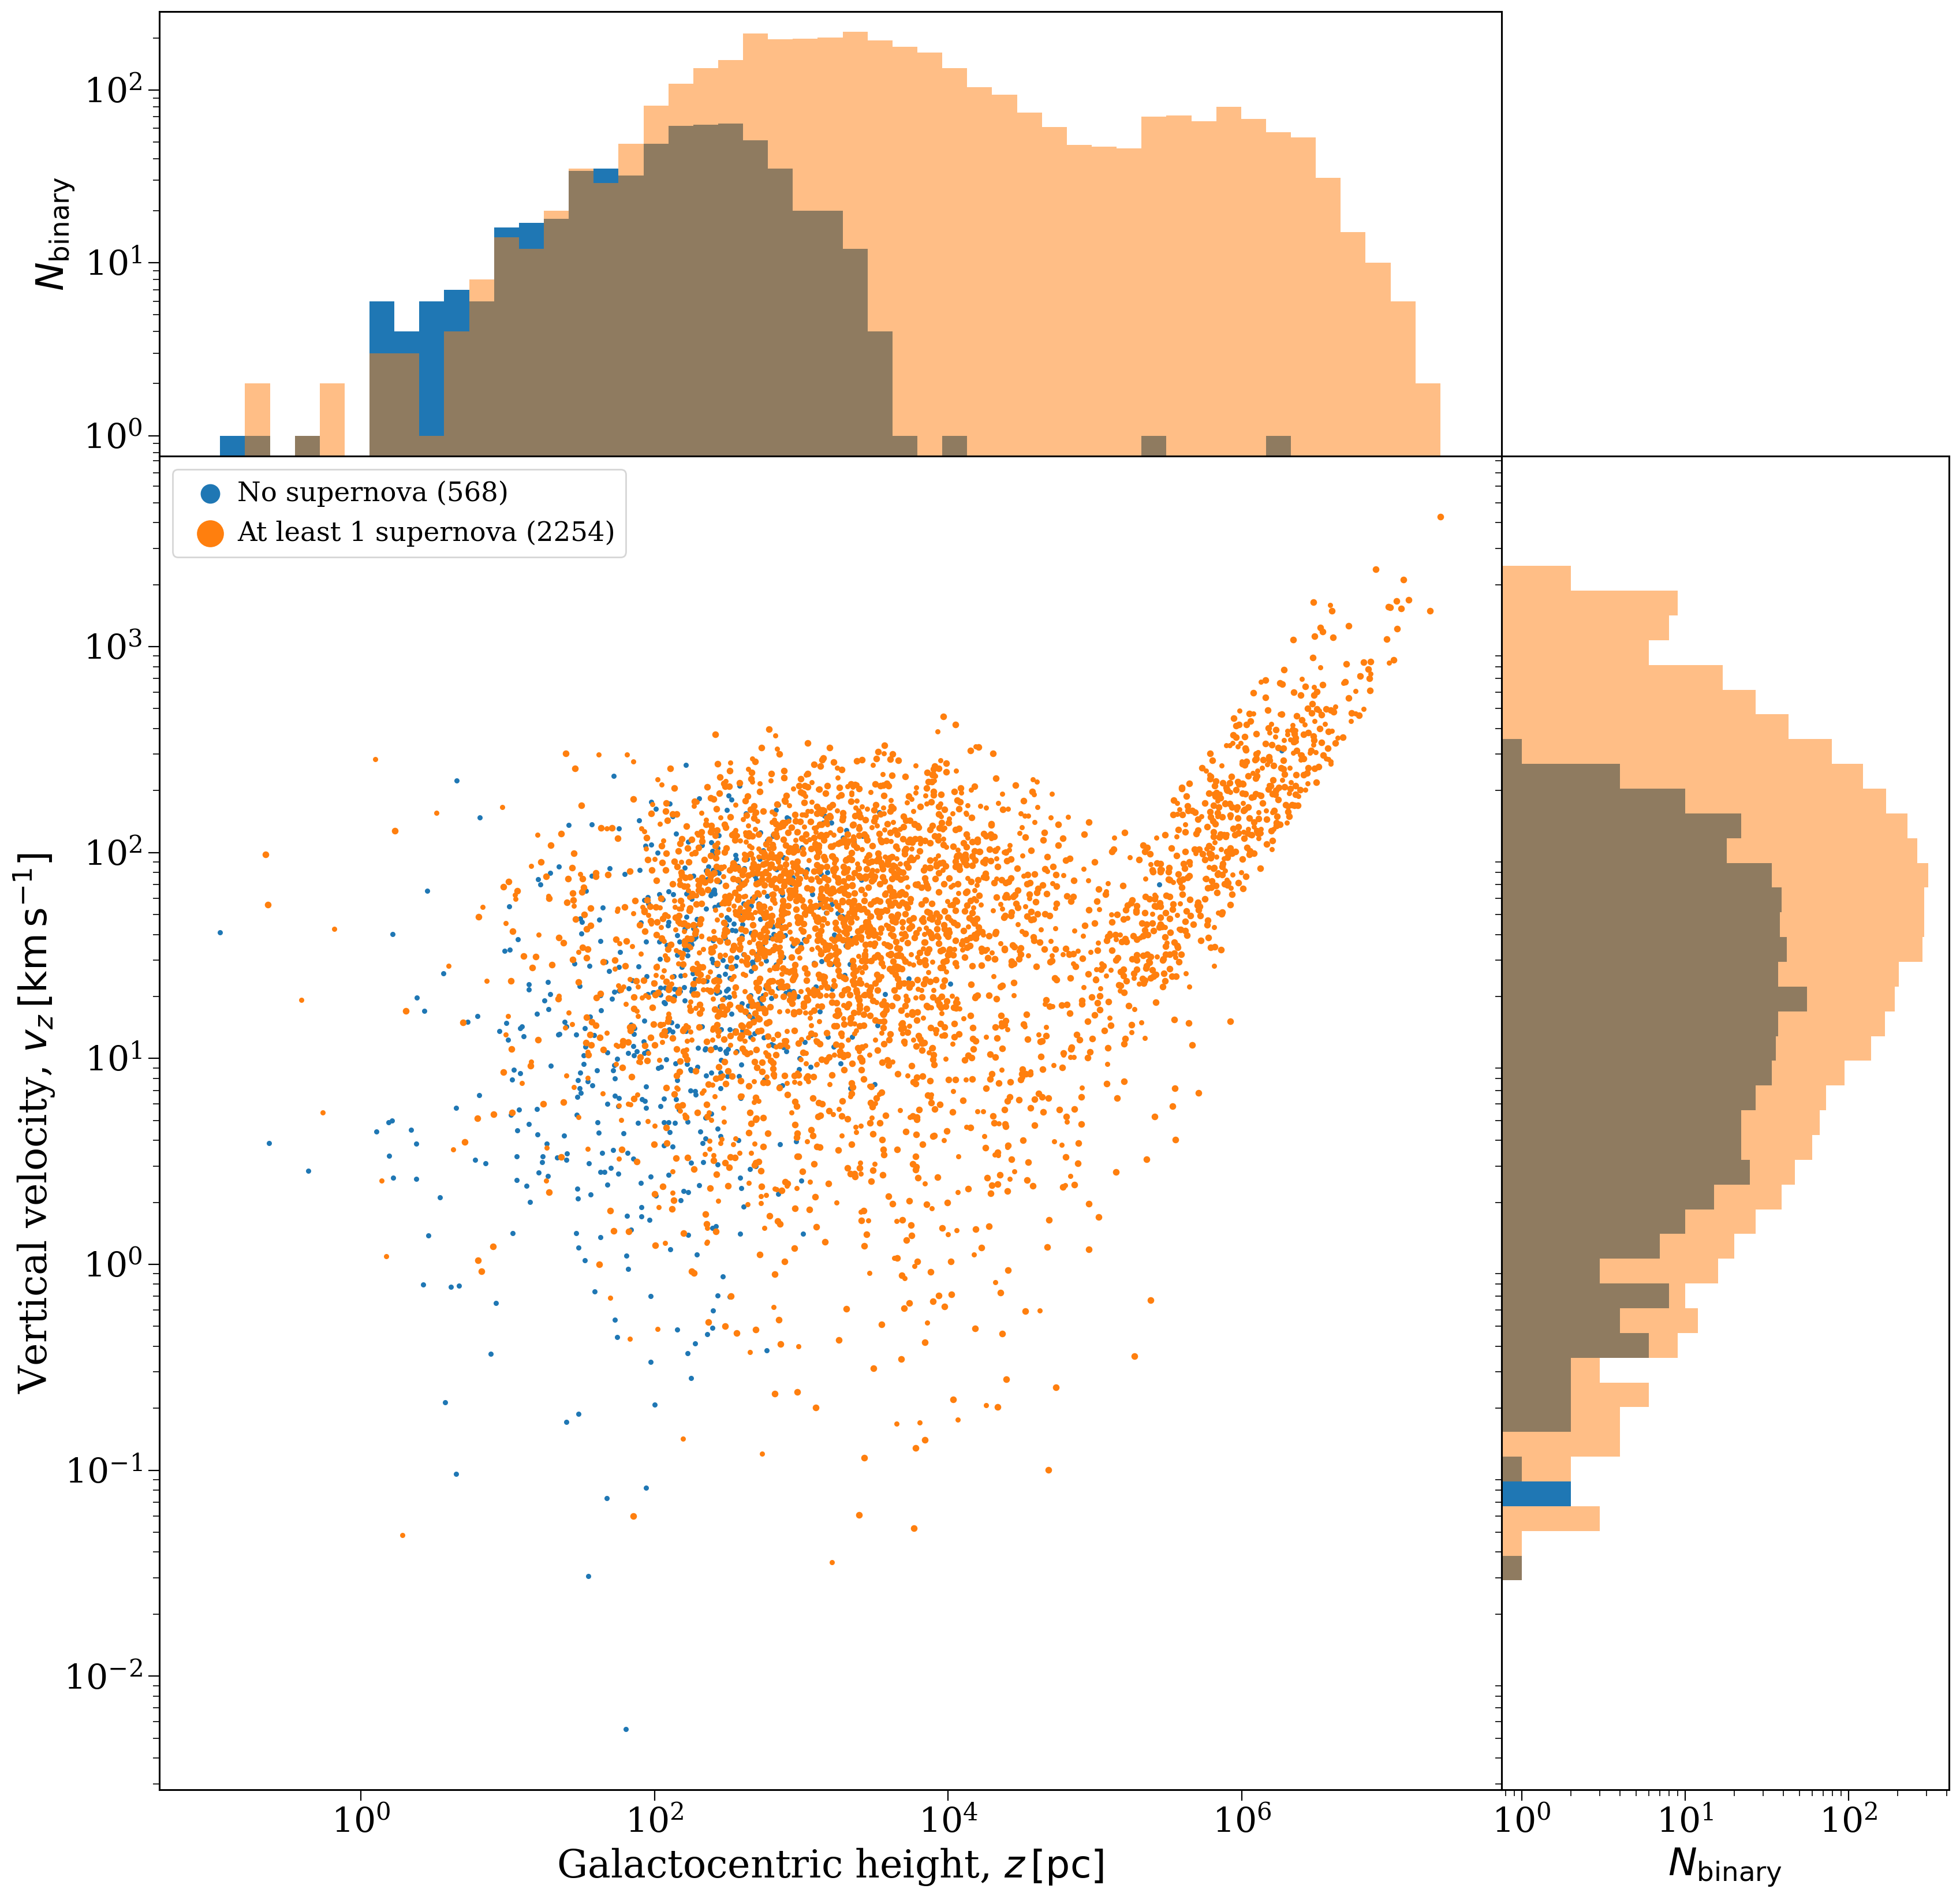

In [17]:
grid_plot("z", "v_z", r"Galactocentric height, $z\,[\rm pc]$", r"Vertical velocity, $v_z\,[\rm km \, s^{-1}]$")

In [18]:
for ind in [1, 2]:
    final_binaries[f"dist_{ind}"] = np.sqrt(final_binaries[f"x_{ind}"]**2 + final_binaries[f"y_{ind}"]**2 + final_binaries[f"z_{ind}"]**2)
    final_binaries[f"speed_{ind}"] = np.sqrt(final_binaries[f"v_x_{ind}"]**2 + final_binaries[f"v_y_{ind}"]**2 + final_binaries[f"v_z_{ind}"]**2)

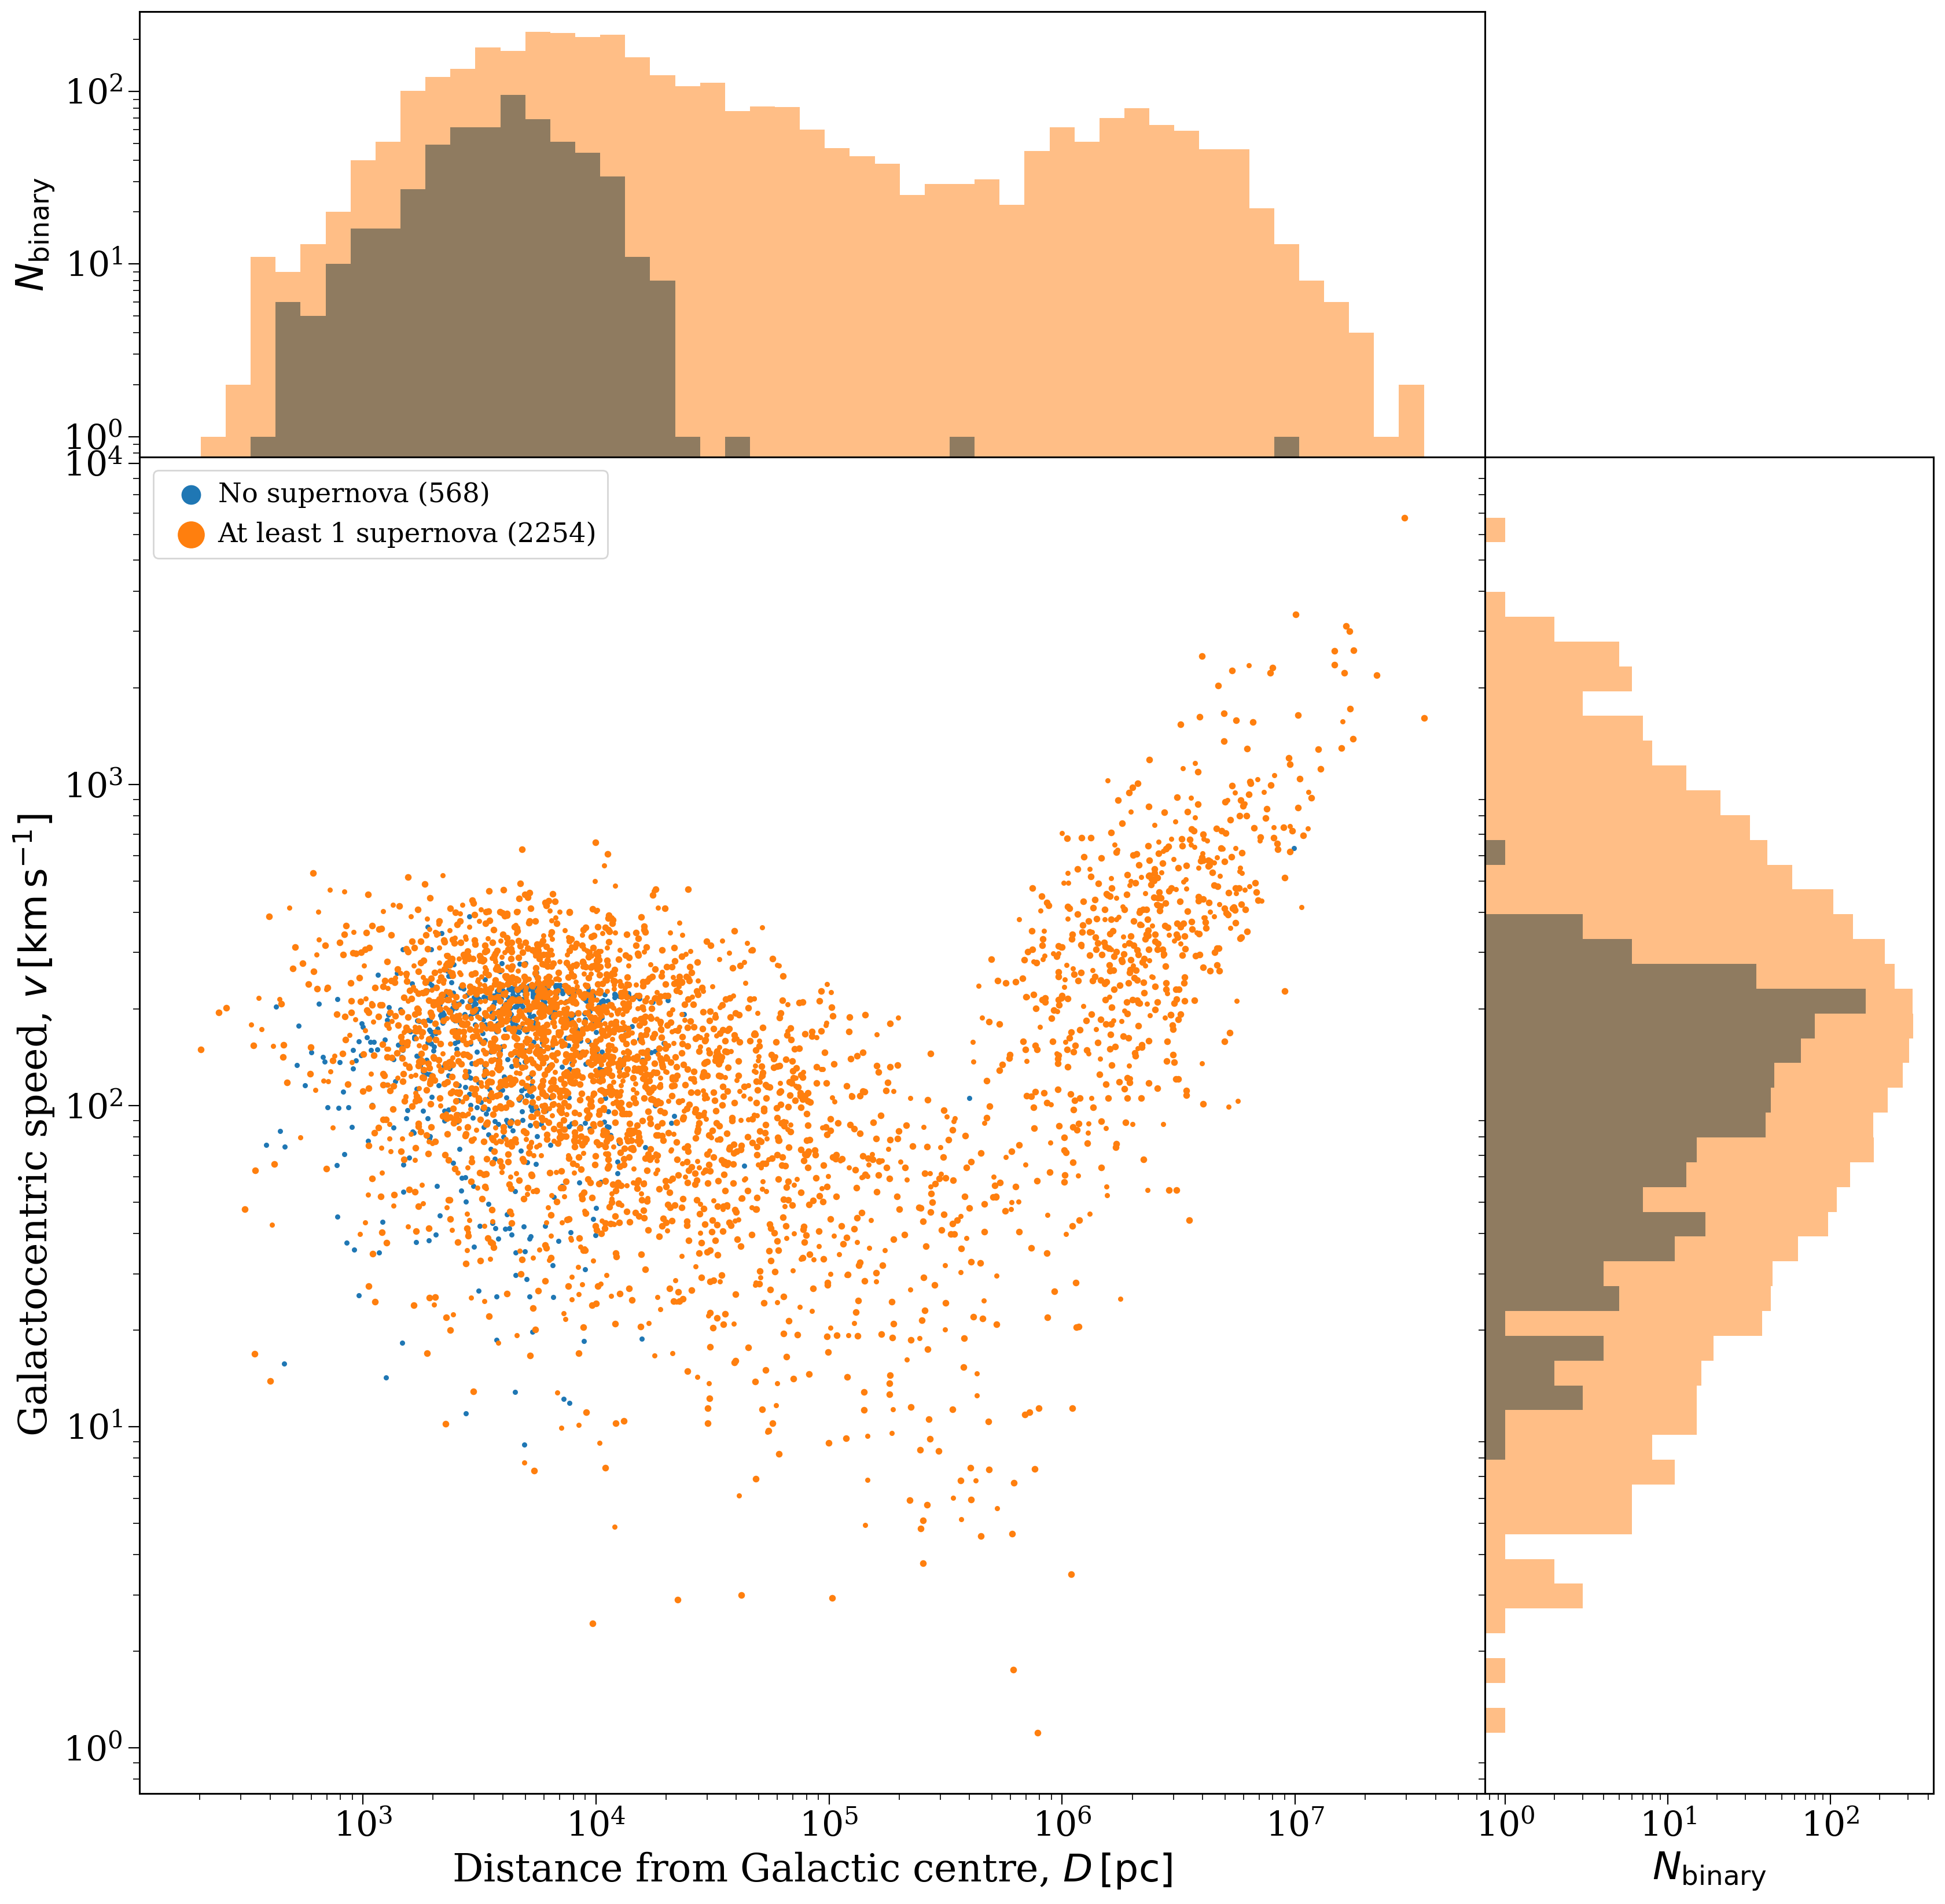

In [23]:
grid_plot("dist", "speed", r"Distance from Galactic centre, $D\,[\rm pc]$", r"Galactocentric speed, $v\,[\rm km \, s^{-1}]$")

In [20]:
def grid_plot_by_mass(x_var, y_var, x_label, y_label, mass_lims=[0.0, 0.1, 1.5, 7.0, 20, np.inf], sizes=[1, 1, 10, 10, 10]):
    fig, axes = plt.subplots(2, 2, figsize=(20, 20), gridspec_kw={"width_ratios": [3, 1], "height_ratios": [1, 3]})

    fig.subplots_adjust(hspace=0.0, wspace=0.0)

    disrupted = final_binaries["sep"] < 0

    x_bins = np.logspace(np.log10(np.abs(final_binaries[f"{x_var}_1"]).min()), np.log10(np.abs(final_binaries[f"{x_var}_1"]).max()), 50)
    y_bins = np.logspace(np.log10(np.abs(final_binaries[f"{y_var}_1"]).min()), np.log10(np.abs(final_binaries[f"{y_var}_1"]).max()), 50)
    for i in range(len(mass_lims) - 1):
        mass_mask = ((p.initial_binaries["mass_1"] >= mass_lims[i]) & (p.initial_binaries["mass_1"] < mass_lims[i + 1])).values
        label = f"{mass_lims[i]} " + r"$\leq m_{1, i} <$" + f" {mass_lims[i + 1]}   ({len(final_binaries[mass_mask])})"
        axes[1, 0].scatter(np.abs(final_binaries[f"{x_var}_1"][mass_mask]), np.abs(final_binaries[f"{y_var}_1"][mass_mask]), s=sizes[i], label=label)
        axes[0, 0].hist(np.abs(final_binaries[f"{x_var}_1"][mass_mask]), bins=x_bins, log=True, histtype="step")
        axes[1, 1].hist(np.abs(final_binaries[f"{y_var}_1"][mass_mask]), bins=y_bins, orientation="horizontal", log=True, histtype="step")

    axes[1, 0].set_xscale("log")
    axes[1, 0].set_yscale("log")

    axes[1, 0].set_xlabel(x_label)
    axes[1, 0].set_ylabel(y_label)

    axes[1, 0].legend(fontsize=0.7*fs, markerscale=5, handletextpad=0.0)

    axes[0, 1].axis("off")
    
    axes[0, 0].set_xscale("log")
    axes[0, 0].set_xticks([])
    axes[0, 0].set_ylabel(r"$N_{\rm binary}$")

    # axes[1, 1].hist(np.abs(final_binaries[f"{y_var}_1"][~kicked]), bins=y_bins, orientation="horizontal", log=True)
    # axes[1, 1].hist(np.abs(np.concatenate((final_binaries[f"{y_var}_1"][kicked], final_binaries[f"{y_var}_2"][kicked]))), bins=y_bins, orientation="horizontal", log=True, alpha=0.5)
    axes[1, 1].set_yscale("log")
    axes[1, 1].set_yticks([])
    axes[1, 1].set_xlabel(r"$N_{\rm binary}$")

    plt.show()

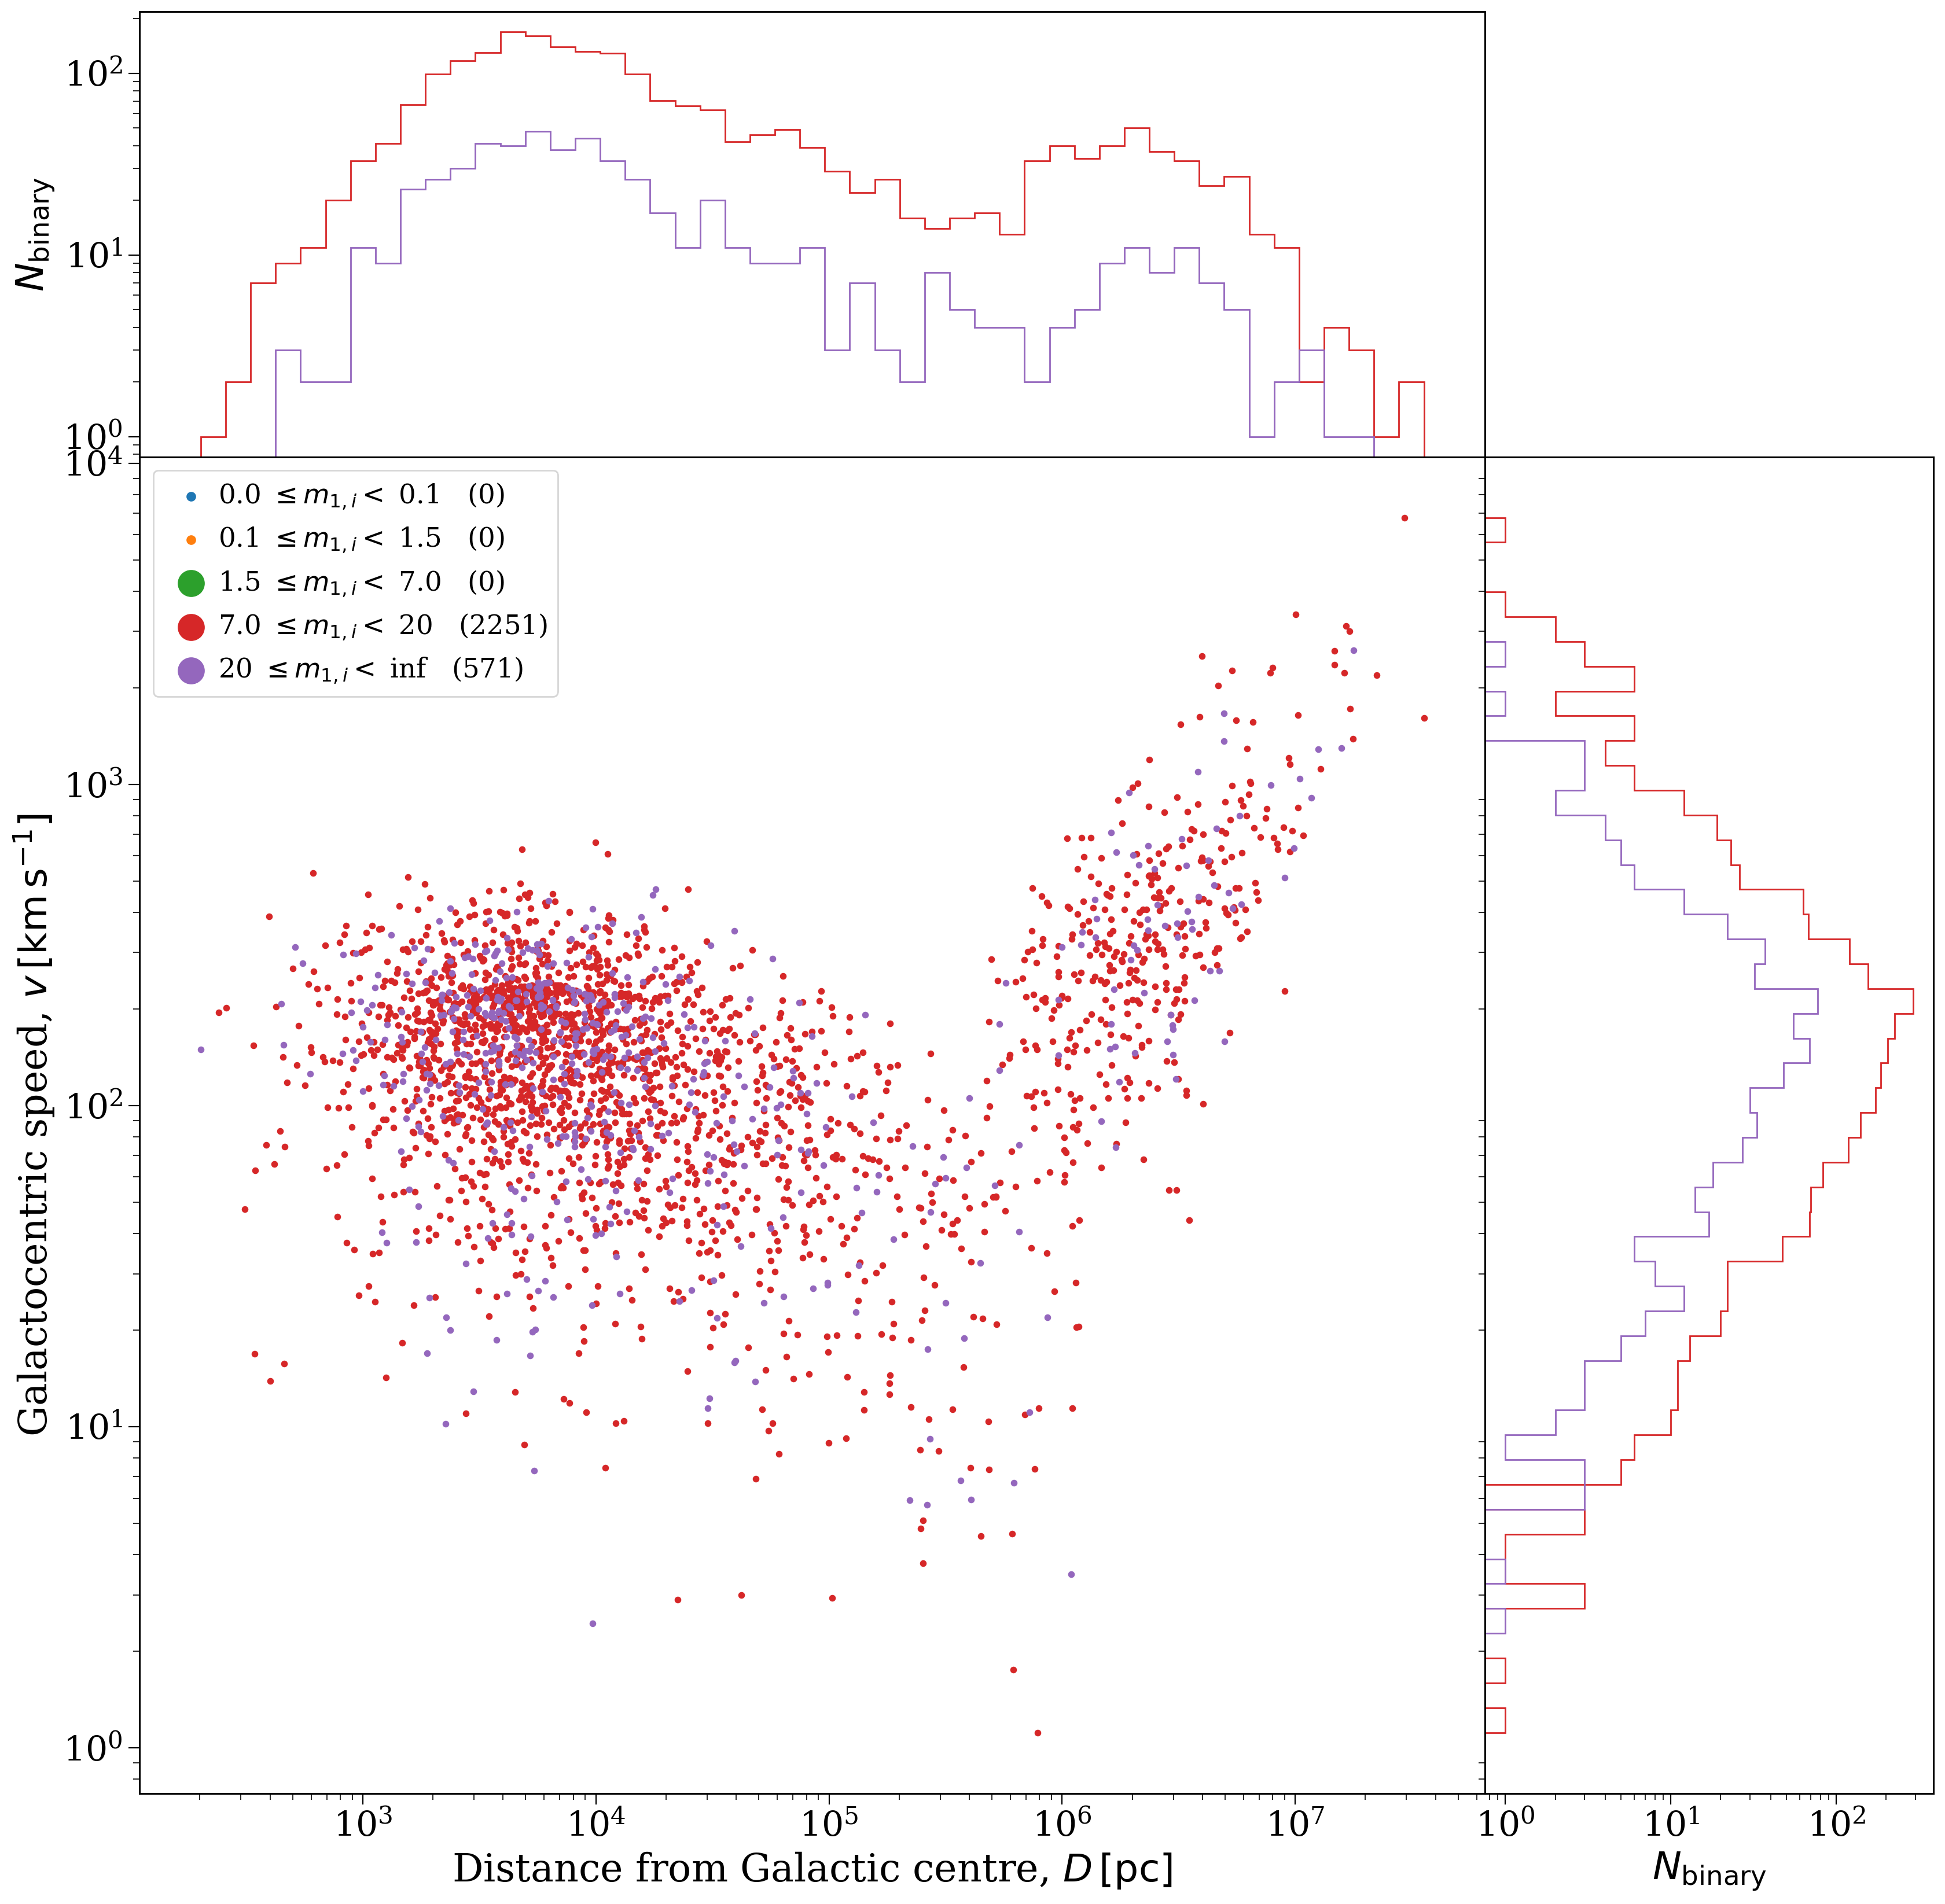

In [22]:
grid_plot_by_mass("dist", "speed", r"Distance from Galactic centre, $D\,[\rm pc]$", r"Galactocentric speed, $v\,[\rm km \, s^{-1}]$")

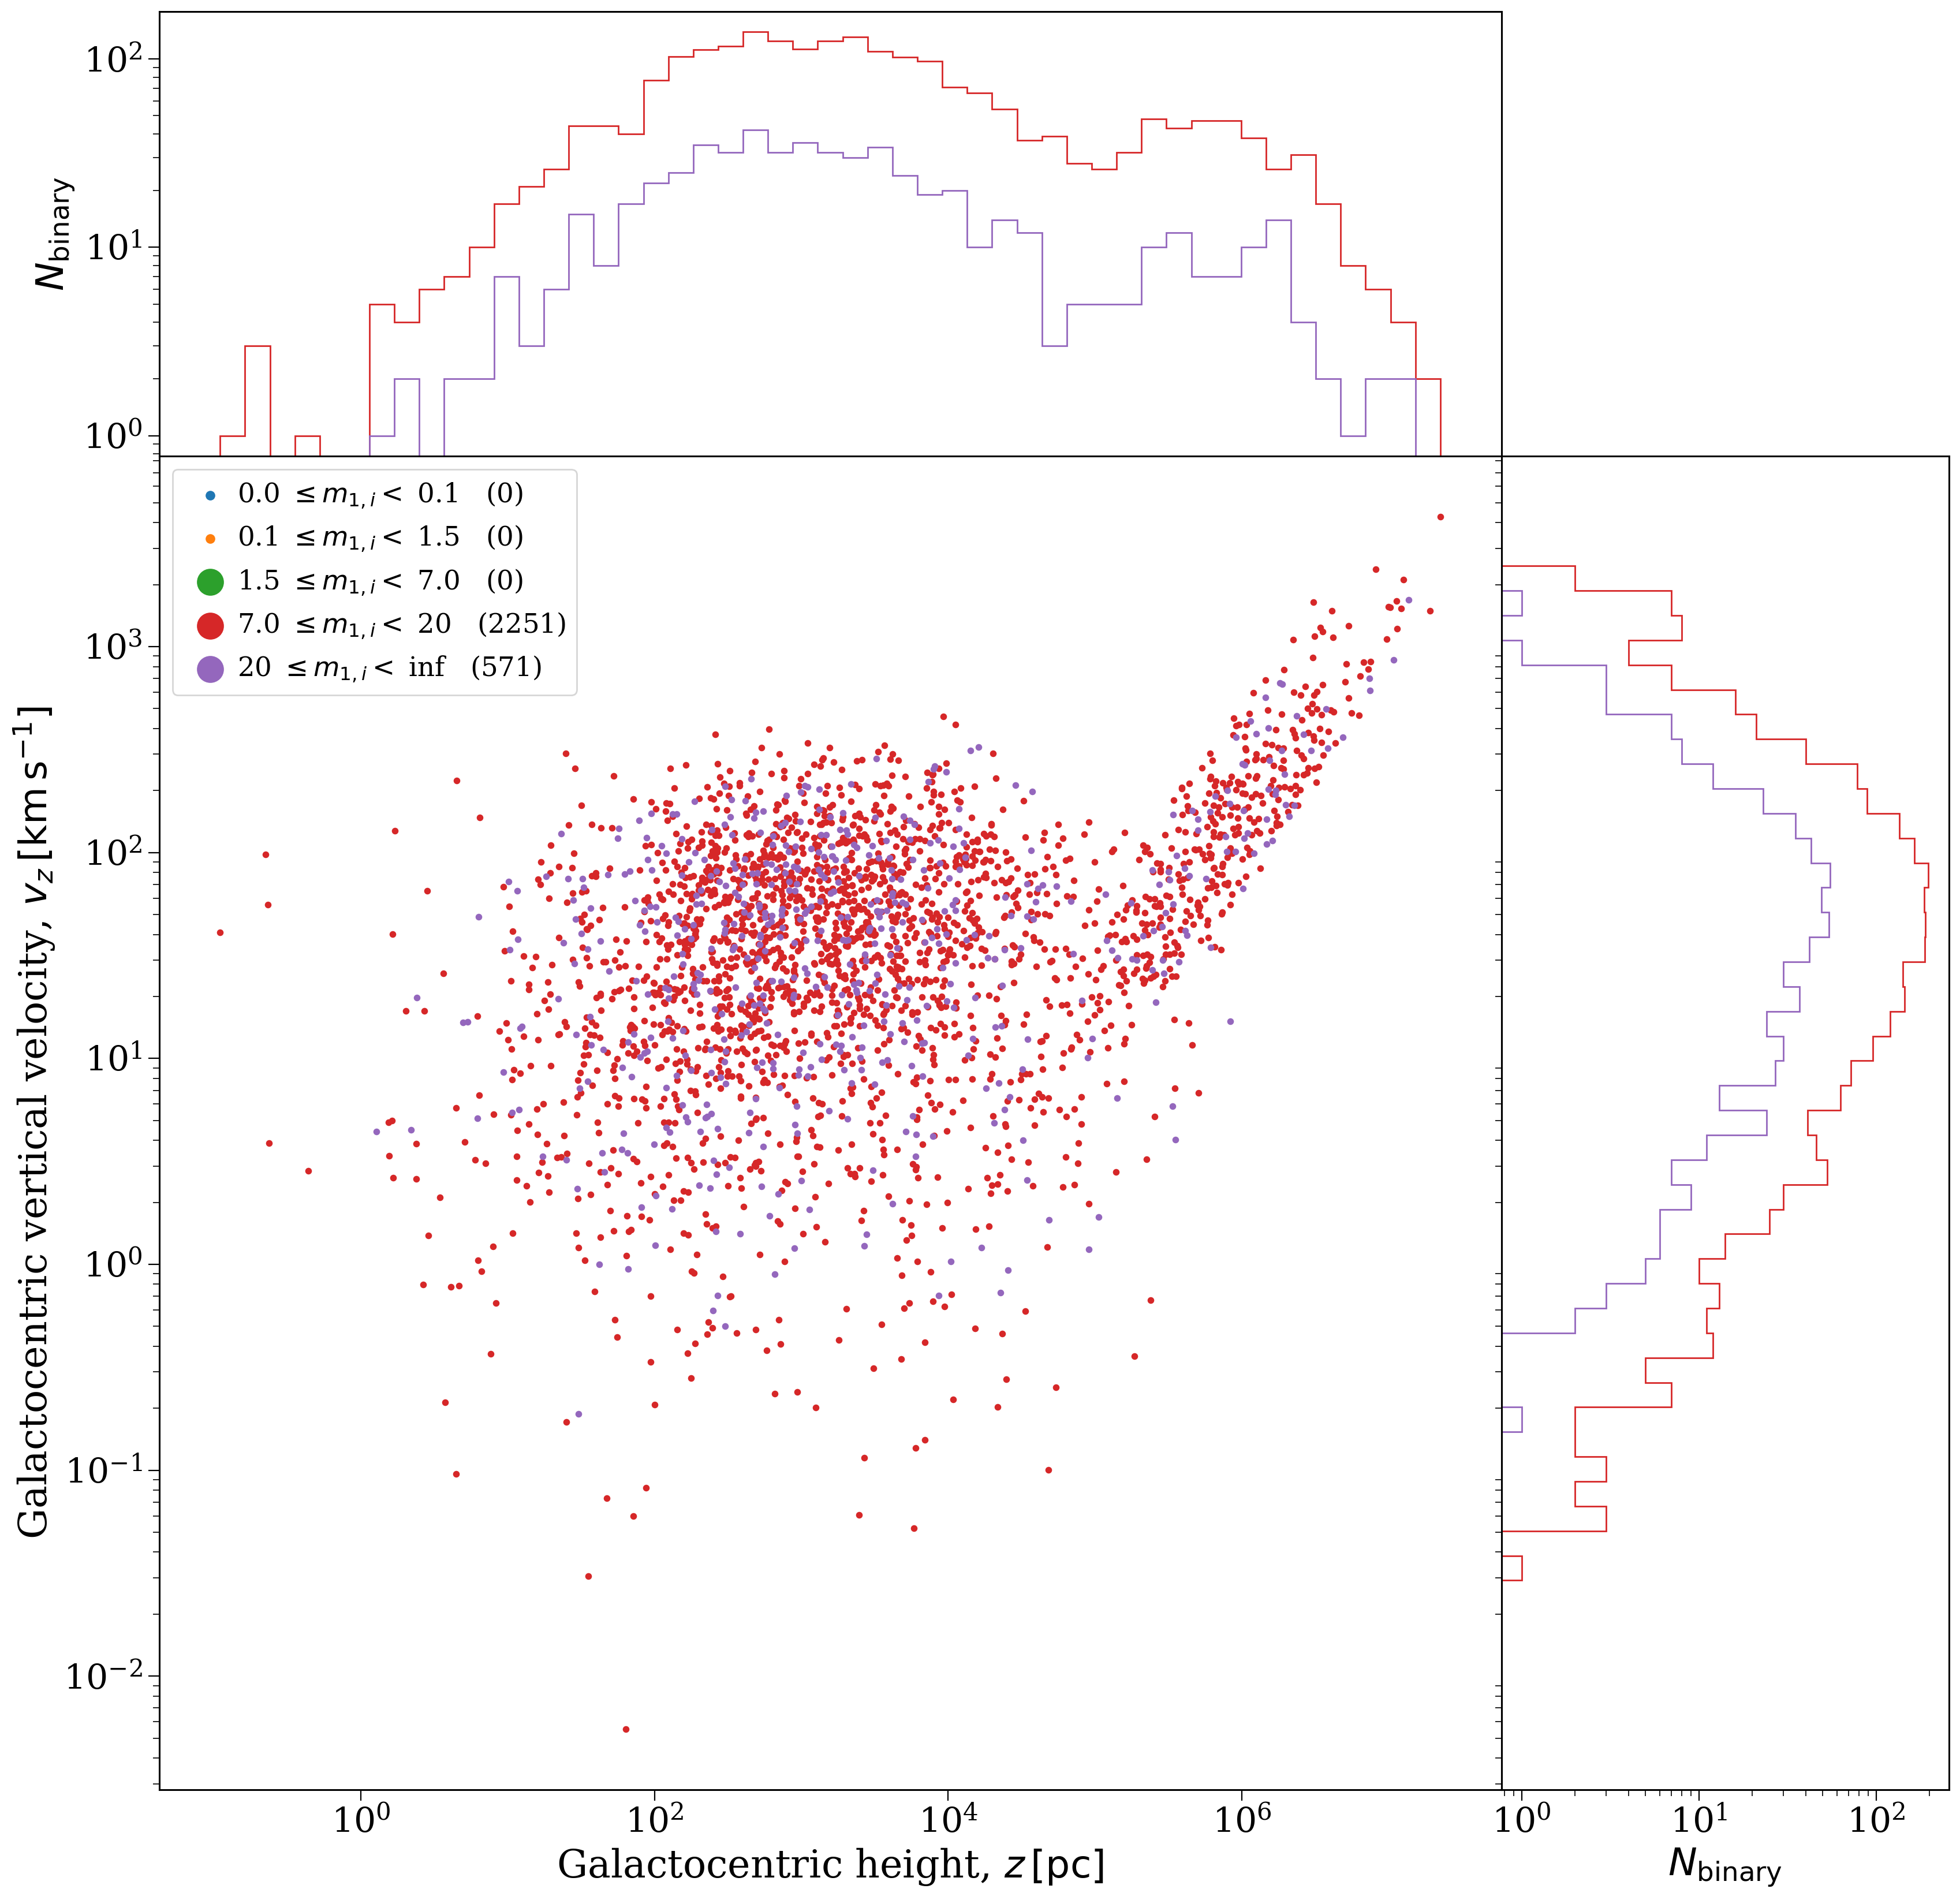

In [24]:
grid_plot_by_mass("z", "v_z", r"Galactocentric height, $z\,[\rm pc]$", r"Galactocentric vertical velocity, $v_z\,[\rm km \, s^{-1}]$")